# Special Topics Project

## Sentiment Analysis

**Dataset**: https://www.kaggle.com/datasets/gpreda/bbc-news

It contains RSS(Really Simple Syndication) feeds from BBC News.
So instead of visiting each website separately to check for new content, you can use RSS to see all the updates in one place, making it easier to stay informed about the topics you care about.


In [1]:
### Step 0. Modules and Defined Functions

In [2]:
#pip install nltk

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import datetime as dt
#nltk.download('all')

In [4]:
def plot_dates_density(datetime_column):
    '''
    Show distribution of values of the datetime column via histogram.
    The earliest and latest dates are stated in the visualisation's title.
    Args:
        datetime_column (str): the name of the column
        with datetime data.
    Returns:
        nothing
    '''
    # First date.
    min_year = news[datetime_column].min().year
    min_month = news[datetime_column].min().month
    min_day = news[datetime_column].min().day
    first_date = f'{min_day}/{min_month}/{min_year}'
    
    # Last date.
    max_year = news[datetime_column].max().year
    max_month = news[datetime_column].max().month
    max_day = news[datetime_column].max().day
    last_date = f'{max_day}/{max_month}/{max_year}'
    
    # Title as a f-string.
    title = f'Period:\nFrom {first_date} to {last_date}\n'
    
    # Histogram.
    news['pubDate'].hist(bins=100)
    
    # Extra bits and bolts.
    plt.title(title, fontsize=15, loc='left')
    plt.xlabel('Year')
    plt.ylabel('Density of news publications')
    plt.xticks(rotation=90, ha='right')
    # Show.
    plt.show()

#### **Step 1.** Data exploration - News

In [5]:
# Getting the location of the jupyterfile
%pwd

'C:\\Users\\leona\\JupyterSplTopics'

In [6]:
# Reading the dataset and storing it in 'news'
news = pd.read_csv('C:\\Users\\leona\\JupyterSplTopics\\bbc_news.csv')

In [7]:
# Showing the first rows of the dataset
print(news.shape)
news.head()

(31469, 5)


,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


##### Tokenization

As an example, in the following line of code we select the title of the news article at the position 200 in the dataframe 'news' and store it in the variable 'example':

In [8]:
example = news['title'][200]

After that it is started a process called Tokenization which breaks down a piece of text into smaller units, typically words or individual characters.
In the code below we are performing the tokenization in the variable 'example' by selecting the 11 tokens(0:11)

In [9]:
tokens= nltk.word_tokenize(example)
tokens[0:11]

['Bairstow', 'ton', 'rescues', 'England', 'against', 'West', 'Indies']

After that we do a POS(part-of-speech) tag process to the tolkens. 
It will tag it word as a noun (NN), a verb (VB), an adjective (JJ), etc.

In [10]:
tagged = nltk.pos_tag(tokens)
tagged

[('Bairstow', 'NNP'),
 ('ton', 'NN'),
 ('rescues', 'NNS'),
 ('England', 'NNP'),
 ('against', 'IN'),
 ('West', 'NNP'),
 ('Indies', 'NNS')]

In the code below we utilize NLTK's 'ne_chunk' function to perform (NER) Named Entity Recognition on the selected tokens. NER is a natural language processing task that identifies and classifies named entities (such as persons, organizations, locations, etc.) in text.

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Bairstow/NNP)
  ton/NN
  rescues/NNS
  (GPE England/NNP)
  against/IN
  (GPE West/NNP)
  Indies/NNS)


##### Formating 'pubDate'

These lines of code below ensure that the 'pubDate' column in the 'news' dataframe is converted to datetime object.

In [12]:
news['pubDate'] = pd.to_datetime(news['pubDate'])
news['pubDate'] = pd.to_datetime(news['pubDate'],format='%Y-%m-%d')

##### Showing some interesting visualizations

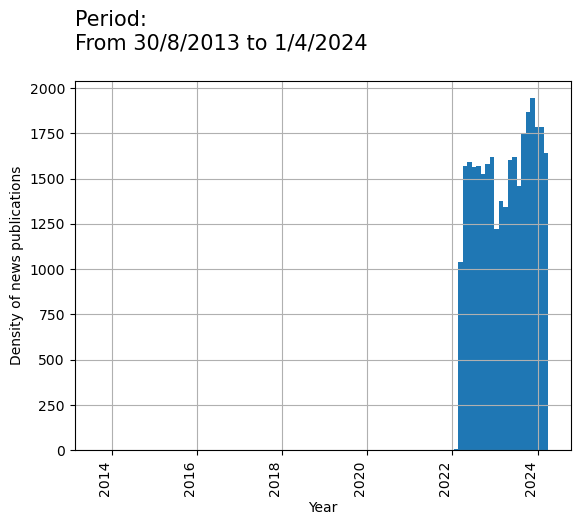

In [13]:
plot_dates_density('pubDate')

In the codes below we will plot only the time frame = before 2022

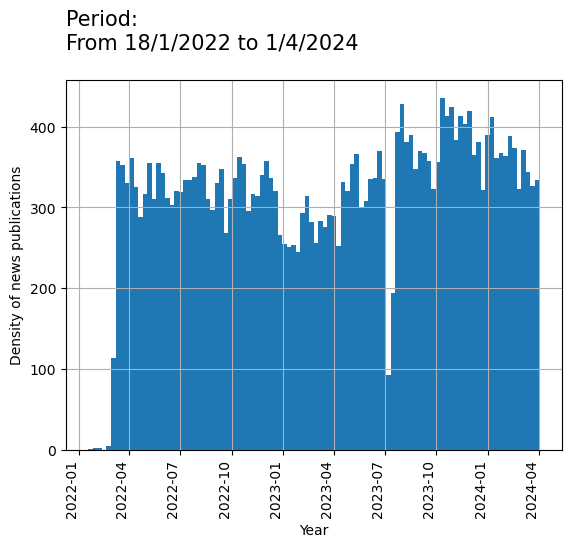

In [14]:
news = news.loc[news['pubDate'].dt.year >= 2022]
plot_dates_density('pubDate')

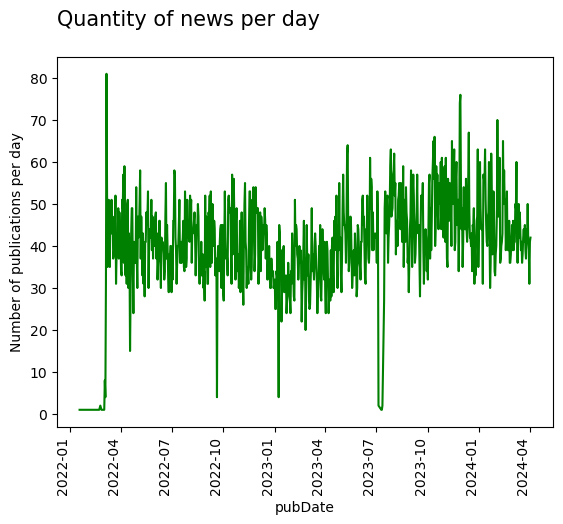

In [15]:
news.groupby(news['pubDate'].dt.date)['title'].count().plot(color = 'g')
plt.xticks(rotation=90, ha='right')

plt.ylabel('Number of publications per day')
plt.title('Quantity of news per day\n' , fontsize=15, loc='left')
plt.show()

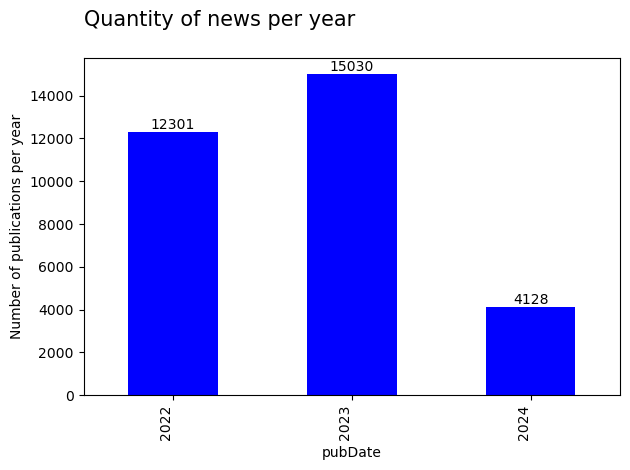

In [16]:
# Calculate the sum of news per year
news_per_year = news.groupby(news['pubDate'].dt.year)['title'].count()

# Create the bar graph
ax = news_per_year.plot(kind='bar', color='b')

# Iterate over the bars to annotate them with the sum of news
for i, value in enumerate(news_per_year):
    ax.text(i, value + 1, str(value), ha='center', va='bottom')

# Customize the plot
plt.xticks(rotation=90, ha='right')
plt.ylabel('Number of publications per year')
plt.title('Quantity of news per year\n', fontsize=15, loc='left')

# Show the plot
plt.tight_layout()
plt.show()

Displaying the values in the 'pubDate' column of the DataFrame news:

In [17]:
news['pubDate']

0       2022-03-07 08:01:56
1       2022-03-06 22:49:58
2       2022-03-07 00:14:42
3       2022-03-07 00:05:40
4       2022-03-07 08:15:53
                ...        
31464   2024-03-27 04:30:00
31465   2024-04-01 21:37:41
31466   2024-04-01 20:04:18
31467   2024-04-01 14:06:29
31468   2024-04-01 20:58:06
Name: pubDate, Length: 31459, dtype: datetime64[ns]

#### **Step 2.** VADER Sentiment Score

##### Definition and Explanation

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for social media and  news texts. It evaluates the sentiment of a piece of text (such as a sentence or paragraph) and assigns a sentiment score to it.

The VADER sentiment score ranges from -1 to +1, where:
Scores clo to se to +1 indicate positive sentr>
nt.
Scores close to -1 indicate negative senr>ment.
Scores around 0 indicate neutral ser>i
ment.
VADER takes into account both the polarity (positive or negative) and the intensity of sentiment in the text. It considers various factors such as capitalization, punctuation, degree modifiers, emojis, and emoticons to accurately assess sentiment.

In summary, VADER Sentiment Score is a numerical representation of the sentiment expressed in a text, ranging from -1 (negative) to +1 (positive), with 0 indicating neutral sentiment. It's a useful tool for analyzing the sentiment of social media texts and other informal communication.

##### Application

In the line of code below we are calling the 'sia.polarity_scores' function which is part of the sentiment analysis functionality provided by the VADER tool.
It is essentially analyzing the sentiment of the text stored in the variable 'example' and returning a dictionary containing the polarity scores. 
These scores can then be used to assess the sentiment of the text.

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [19]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.3182}

##### Analysing the output:

- 'neg': 0.0: This indicates that 0% of the words in the text are classified as negative. In other words, there are no negative words detected in the text.

- 'neu': 0.723: This indicates that approximately 72.3% of the words in the text are classified as neutral. These are words that don't express a strong positive or negative sentiment.

- 'pos': 0.277: This indicates that approximately 27.7% of the words in the text are classified as positive. These are words that express a positive sentiment.

- 'compound': 0.3182: This is the compound sentiment score of the text. It's a single value that represents the overall sentiment of the text, taking into account both the positive and negative words as well as their intensity. In this case, the compound score is 0.3182, which indicates a slightly positive sentiment overall.

So, in simple terms, the output suggests that the text analyzed has a predominantly neutral sentiment, with a slight positive leaning overall.

##### Running the VADER score for whole dataset:

In [20]:
res = {}
for i, row in tqdm(news.iterrows(), total = len(news)):
  title = row['title']
  myid = row['guid']
  res[myid] = sia.polarity_scores(title)

  0%|          | 0/31459 [00:00<?, ?it/s]

Storing the VADER score for whole dataset into the variable 'vader'. And displaying the first 10 rows:

In [21]:
vaders = pd.DataFrame(res).T
vaders.head(10)

,neg,neu,pos,compound
https://www.bbc.co.uk/news/world-europe-60638042,0.528,0.472,0.000,-0.7717
https://www.bbc.co.uk/news/world-europe-60641873,0.500,0.500,0.000,-0.7906
https://www.bbc.co.uk/news/business-60623941,0.640,0.360,0.000,-0.7964
https://www.bbc.co.uk/news/uk-60579079,0.000,0.796,0.204,0.3182
https://www.bbc.co.uk/news/business-60642786,0.158,0.685,0.158,0.0000
https://www.bbc.co.uk/news/uk-60642926,0.302,0.698,0.000,-0.5994
https://www.bbc.co.uk/news/uk-60640460,0.283,0.580,0.138,-0.4588
https://www.bbc.co.uk/news/business-60641988,0.000,1.000,0.000,0.0000
https://www.bbc.co.uk/news/uk-60640975,0.299,0.701,0.000,-0.5719
https://www.bbc.co.uk/news/world-europe-60640204,0.535,0.465,0.000,-0.5574


Reseting the index of 'vaders', rename the index column to 'guid', and then merge vaders with the 'news' DataFrame based on a common key.

In [22]:
vaders.reset_index(inplace = True)
vaders.rename(columns= {'index':'guid'}, inplace = True)
vaders = vaders.merge(news, how = 'left')

In [23]:
vaders.head()

,guid,neg,neu,pos,compound,title,pubDate,link,description
0,https://www.bbc.co.uk/news/world-europe-60638042,0.528,0.472,0.000,-0.7717,Ukraine: Angry Zelensky vows to punish Russian...,2022-03-07 08:01:56,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,https://www.bbc.co.uk/news/world-europe-60641873,0.500,0.500,0.000,-0.7906,War in Ukraine: Taking cover in a town under a...,2022-03-06 22:49:58,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,https://www.bbc.co.uk/news/business-60623941,0.640,0.360,0.000,-0.7964,Ukraine war 'catastrophic for global food',2022-03-07 00:14:42,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,https://www.bbc.co.uk/news/uk-60579079,0.000,0.796,0.204,0.3182,Manchester Arena bombing: Saffie Roussos's par...,2022-03-07 00:05:40,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,https://www.bbc.co.uk/news/business-60642786,0.158,0.685,0.158,0.0000,Ukraine conflict: Oil price soars to highest l...,2022-03-07 08:15:53,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


##### Plot Scores:

(array([0.2287811 , 0.53261557, 0.52175258, 0.50101415, 0.22137452,
        2.01327369, 0.34086738, 0.45558711, 0.27552487, 0.08706849]),
 array([-9.6610e-01, -7.7297e-01, -5.7984e-01, -3.8671e-01, -1.9358e-01,
        -4.5000e-04,  1.9268e-01,  3.8581e-01,  5.7894e-01,  7.7207e-01,
         9.6520e-01]),
 <BarContainer object of 10 artists>)

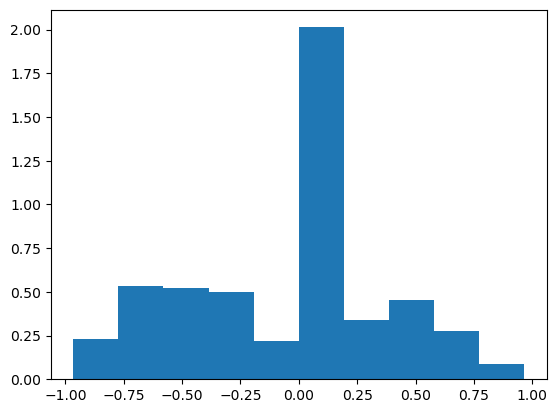

In [24]:
plt.hist(vaders['compound'], density = True, bins = 10)

Displaying the average index average per date

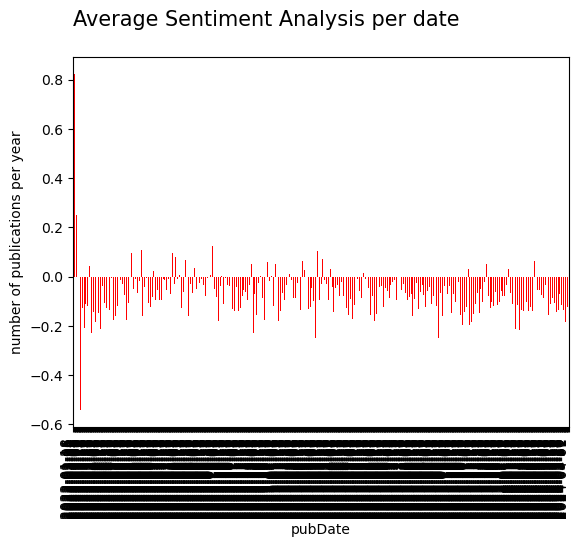

In [25]:
vaders.groupby(vaders['pubDate'].dt.date)['compound'].mean().plot(kind='bar',color = 'r')
plt.xticks(rotation=90, ha='right')

plt.ylabel('number of publications per year')
plt.title('Average Sentiment Analysis per date\n' , fontsize=15, loc='left')
plt.show()

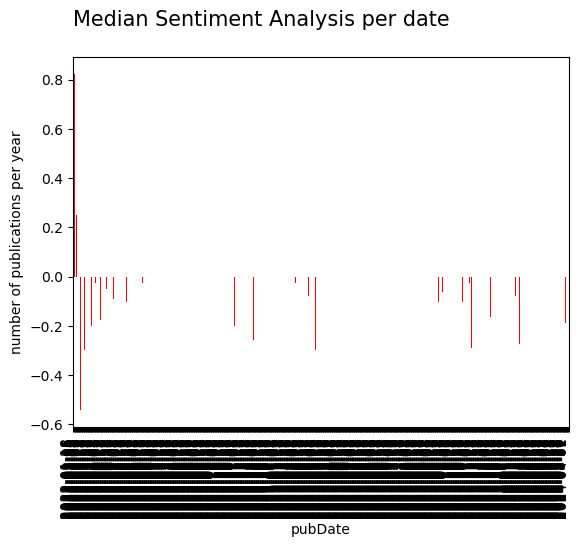

In [26]:
vaders.groupby(vaders['pubDate'].dt.date)['compound'].median().plot(kind='bar',color = 'r')
plt.xticks(rotation=90, ha='right')

plt.ylabel('number of publications per year')
plt.title('Median Sentiment Analysis per date\n' , fontsize=15, loc='left')
plt.show()

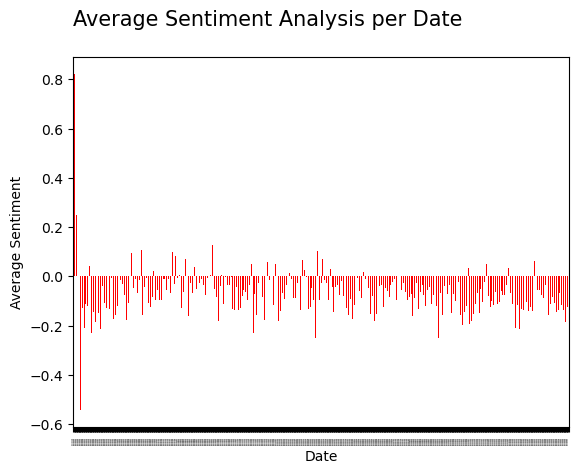

In [27]:
# Assuming vaders is your DataFrame

# Plotting
ax = vaders.groupby(vaders['pubDate'].dt.date)['compound'].mean().plot(kind='bar', color='r')
plt.xticks(rotation=90, ha='right', fontsize=1)  # Adjust fontsize as needed

plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Analysis per Date\n', fontsize=15, loc='left')
plt.xlabel('Date')
plt.show()

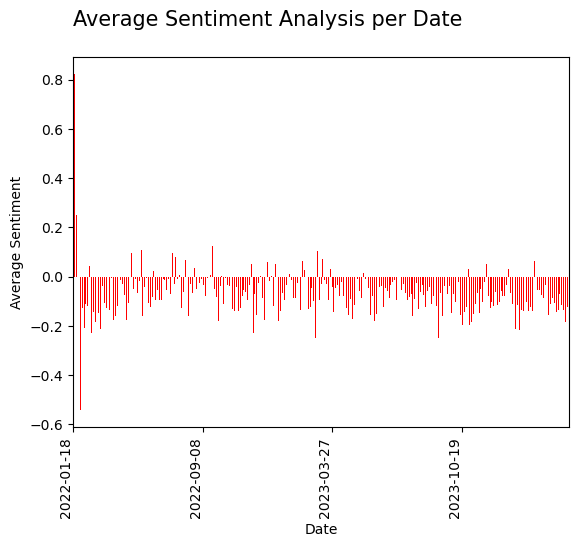

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming vaders is your DataFrame

# Plotting
ax = vaders.groupby(vaders['pubDate'].dt.date)['compound'].mean().plot(kind='bar', color='r')

# Customize which x-axis labels to display
# For example, to display every 5th label, you can set the step as 5
step = 200
plt.xticks(range(0, len(ax.get_xticks()), step), ax.get_xticklabels()[::step], rotation=90, ha='right')

plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Analysis per Date\n', fontsize=15, loc='left')
plt.xlabel('Date')
plt.show()

##### Making a Summary of Vader's output to merge to the LSTM Model

In [29]:
vaders.dtypes

guid                   object
neg                   float64
neu                   float64
pos                   float64
compound              float64
title                  object
pubDate        datetime64[ns]
link                   object
description            object
dtype: object

In [30]:
# creating a copy of Vaders to make the summary

In [31]:
vaders_summary = vaders

vaders_summary.dtypes

guid                   object
neg                   float64
neu                   float64
pos                   float64
compound              float64
title                  object
pubDate        datetime64[ns]
link                   object
description            object
dtype: object

In [32]:
# Convert 'pubDate' column to datetime if it's not already in datetime format
vaders_summary['pubDate'] = pd.to_datetime(vaders_summary['pubDate'])

# Convert the datetime format to MM-DD-YYYY
vaders_summary['pubDate'] = vaders_summary['pubDate'].dt.strftime('%m-%d-%Y')

# Display the DataFrame to verify the changes
print(vaders_summary.head())

                                               guid    neg    neu    pos  \
0  https://www.bbc.co.uk/news/world-europe-60638042  0.528  0.472  0.000   
1  https://www.bbc.co.uk/news/world-europe-60641873  0.500  0.500  0.000   
2      https://www.bbc.co.uk/news/business-60623941  0.640  0.360  0.000   
3            https://www.bbc.co.uk/news/uk-60579079  0.000  0.796  0.204   
4      https://www.bbc.co.uk/news/business-60642786  0.158  0.685  0.158   

   compound                                              title     pubDate  \
0   -0.7717  Ukraine: Angry Zelensky vows to punish Russian...  03-07-2022   
1   -0.7906  War in Ukraine: Taking cover in a town under a...  03-06-2022   
2   -0.7964         Ukraine war 'catastrophic for global food'  03-07-2022   
3    0.3182  Manchester Arena bombing: Saffie Roussos's par...  03-07-2022   
4    0.0000  Ukraine conflict: Oil price soars to highest l...  03-07-2022   

                                                link  \
0  https://www.bbc

In [33]:
# Keeping only the 'compound' and 'pubDate' columns and dropping the rest
vaders_summary = vaders_summary[['compound', 'pubDate']]
vaders_summary

,compound,pubDate
0,-0.7717,03-07-2022
1,-0.7906,03-06-2022
2,-0.7964,03-07-2022
3,0.3182,03-07-2022
4,0.0000,03-07-2022
...,...,...
31454,-0.4767,03-27-2024
31455,0.0000,04-01-2024
31456,0.0000,04-01-2024
31457,-0.6448,04-01-2024


In [34]:
# Convert 'pubDate' column to datetime if it's not already in datetime format
vaders_summary['pubDate'] = pd.to_datetime(vaders_summary['pubDate'])

#Calculate the average compound index per day
vaders_summary['avg_compound'] = vaders_summary.groupby(vaders_summary['pubDate'].dt.date)['compound'].transform('mean')

vaders_summary = vaders_summary.rename(columns={'pubDate': 'date'})

vaders_summary

C:\Users\leona\AppData\Local\Temp\ipykernel_380\1391555428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaders_summary['pubDate'] = pd.to_datetime(vaders_summary['pubDate'])
C:\Users\leona\AppData\Local\Temp\ipykernel_380\1391555428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaders_summary['avg_compound'] = vaders_summary.groupby(vaders_summary['pubDate'].dt.date)['compound'].transform('mean')


,compound,date,avg_compound
0,-0.7717,2022-03-07,-0.224473
1,-0.7906,2022-03-06,-0.128635
2,-0.7964,2022-03-07,-0.224473
3,0.3182,2022-03-07,-0.224473
4,0.0000,2022-03-07,-0.224473
...,...,...,...
31454,-0.4767,2024-03-27,-0.183528
31455,0.0000,2024-04-01,-0.150179
31456,0.0000,2024-04-01,-0.150179
31457,-0.6448,2024-04-01,-0.150179


##### Saving to a CSV file named 'vader_data.csv':

In [35]:
# Saving to a CSV file named 'vader_data.csv'
#vaders_summary.to_csv('vaders_summary.csv', index=False)

vaders_summary = vaders_summary.rename(columns={'date': 'Date'})


In [36]:
# Reading the dataset with BP StockPrice
BP_stock = pd.read_csv('BP_yahoofinance.csv')
BP_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,26.690001,27.480000,26.650000,27.370001,24.747339,9785600
1,2022-01-04,28.129999,28.700001,28.110001,28.549999,25.814268,15444300
2,2022-01-05,28.930000,29.070000,28.360001,28.370001,25.651520,13507900
3,2022-01-06,29.020000,29.120001,28.590000,28.809999,26.049353,13366900
4,2022-01-07,29.270000,29.700001,29.080000,29.670000,26.826948,16171800
...,...,...,...,...,...,...,...
557,2024-03-22,37.869999,37.869999,37.660000,37.799999,37.799999,3696200
558,2024-03-25,38.119999,38.480000,38.110001,38.259998,38.259998,8388700
559,2024-03-26,38.189999,38.220001,37.560001,37.570000,37.570000,7600900
560,2024-03-27,37.230000,37.490002,37.189999,37.459999,37.459999,5929300


In [37]:
# Keeping only the 'Date' and 'Close' columns and dropping the rest
#BP_stock = BP_stock[['Date', 'Close']]

#BP_stock = BP_stock.rename(columns={'Date': 'date','Close': 'close'})

BP_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,26.690001,27.480000,26.650000,27.370001,24.747339,9785600
1,2022-01-04,28.129999,28.700001,28.110001,28.549999,25.814268,15444300
2,2022-01-05,28.930000,29.070000,28.360001,28.370001,25.651520,13507900
3,2022-01-06,29.020000,29.120001,28.590000,28.809999,26.049353,13366900
4,2022-01-07,29.270000,29.700001,29.080000,29.670000,26.826948,16171800
...,...,...,...,...,...,...,...
557,2024-03-22,37.869999,37.869999,37.660000,37.799999,37.799999,3696200
558,2024-03-25,38.119999,38.480000,38.110001,38.259998,38.259998,8388700
559,2024-03-26,38.189999,38.220001,37.560001,37.570000,37.570000,7600900
560,2024-03-27,37.230000,37.490002,37.189999,37.459999,37.459999,5929300


In [38]:
# Merge the two DataFrames based on the 'date' column

# Convert the 'date' column in 'vaders_summary' to datetime if it's not already in datetime format
vaders_summary['Date'] = pd.to_datetime(vaders_summary['Date'])

# Convert the 'date' column in 'BP_stock' to datetime if it's not already in datetime format
BP_stock['Date'] = pd.to_datetime(BP_stock['Date'])

# Merge the two DataFrames based on the 'date' column
merged_df2 = vaders_summary.merge(BP_stock[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']], on='Date', how='left')

merged_df2

,compound,Date,avg_compound,Open,High,Low,Close,Adj Close,Volume
0,-0.7717,2022-03-07,-0.224473,28.370001,28.730000,27.969999,28.500000,26.031946,26330200.0
1,-0.7906,2022-03-06,-0.128635,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.7964,2022-03-07,-0.224473,28.370001,28.730000,27.969999,28.500000,26.031946,26330200.0
3,0.3182,2022-03-07,-0.224473,28.370001,28.730000,27.969999,28.500000,26.031946,26330200.0
4,0.0000,2022-03-07,-0.224473,28.370001,28.730000,27.969999,28.500000,26.031946,26330200.0
...,...,...,...,...,...,...,...,...,...
31454,-0.4767,2024-03-27,-0.183528,37.230000,37.490002,37.189999,37.459999,37.459999,5929300.0
31455,0.0000,2024-04-01,-0.150179,NaN,NaN,NaN,NaN,NaN,NaN
31456,0.0000,2024-04-01,-0.150179,NaN,NaN,NaN,NaN,NaN,NaN
31457,-0.6448,2024-04-01,-0.150179,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Drop rows with null values
merged_df2 = merged_df2.dropna()

# Drop column 'compound'
merged_df2 = merged_df2.drop(columns='compound')

# Drop duplicate rows
merged_df2 = merged_df2.drop_duplicates()

merged_df2

,Date,avg_compound,Open,High,Low,Close,Adj Close,Volume
0,2022-03-07,-0.224473,28.370001,28.730000,27.969999,28.500000,26.031946,26330200.0
32,2022-03-16,-0.187827,28.389999,28.620001,28.139999,28.610001,26.132420,17662100.0
33,2022-03-17,0.041381,28.969999,29.230000,28.809999,29.040001,26.525185,18703900.0
34,2022-03-18,-0.055770,28.660000,28.850000,28.370001,28.740000,26.251162,16269400.0
39,2022-04-04,-0.043263,30.000000,30.040001,29.620001,29.790001,27.210234,13298000.0
...,...,...,...,...,...,...,...,...
30957,2024-03-22,-0.185884,37.869999,37.869999,37.660000,37.799999,37.799999,3696200.0
31088,2024-03-25,-0.112509,38.119999,38.480000,38.110001,38.259998,38.259998,8388700.0
31128,2024-03-26,-0.155105,38.189999,38.220001,37.560001,37.570000,37.570000,7600900.0
31164,2024-03-27,-0.183528,37.230000,37.490002,37.189999,37.459999,37.459999,5929300.0


In [40]:
# Saving to a CSV file named 'merged_df.csv'
merged_df2.to_csv('merged_df2.csv', index=False)